In [1]:
# dependencies and setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read and display first data set
civilian_labor_df = pd.read_csv('data/civilian-labor-force-by-sex.csv')
civilian_labor_df.head()

,Year,Number of women in the civilian labor force (in thousands),Number of men in the civilian labor force (in thousands),Share of the civilian labor force who are women (percent),Share of the civilian labor force who are men (percent)
0,1948,"17,335","43,286",28.6,71.4
1,1949,"17,788","43,498",29.0,71.0
2,1950,"18,389","43,819",29.6,70.4
3,1951,"19,016","43,001",30.7,69.3
4,1952,"19,269","42,869",31.0,69.0


In [3]:
percent_women_df = pd.DataFrame({"Year": civilian_labor_df["Year"],
                                "Women in Workforce(%)": civilian_labor_df["Share of the civilian labor force who are women (percent)"]})
percent_women_df.head()

,Year,Women in Workforce(%)
0,1948,28.6
1,1949,29.0
2,1950,29.6
3,1951,30.7
4,1952,31.0


In [4]:
# create x and y for plotting
x_axis = percent_women_df["Year"]
percent_women = percent_women_df["Women in Workforce(%)"]

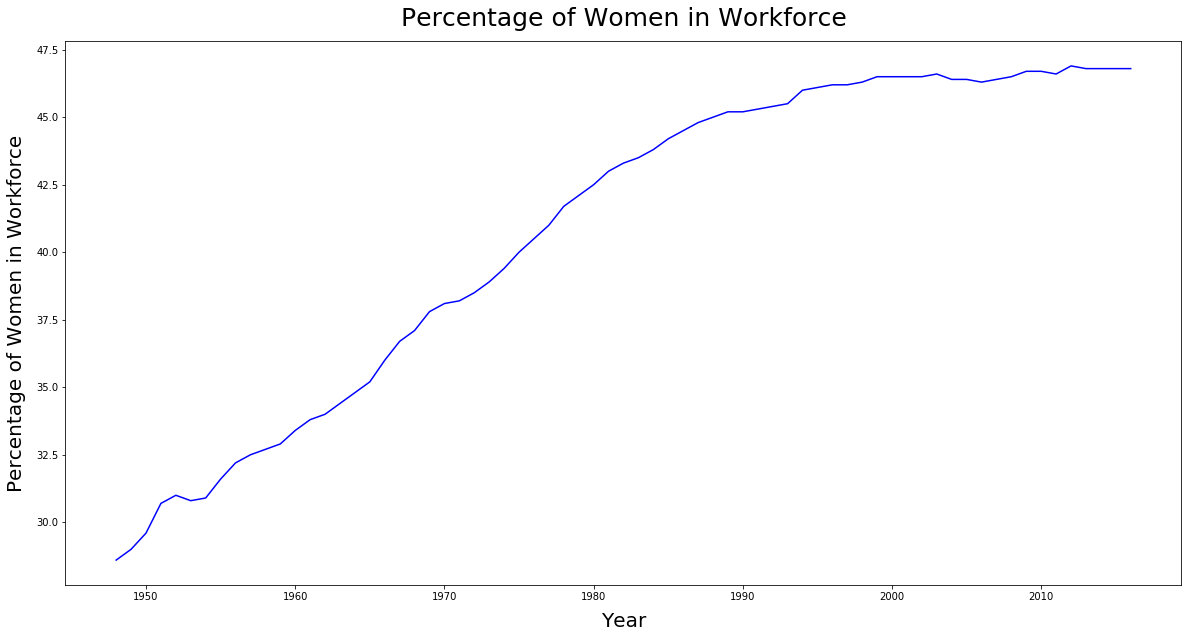

In [5]:
# plot crude data % of women in workforce
plt.figure(figsize=(20,10))
plt.title("Percentage of Women in Workforce", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Percentage of Women in Workforce", fontsize=20, labelpad=10)
plt.plot(x_axis, percent_women, color='blue')
plt.savefig("Images/percentage-women-workforce-lineplot.png",bbox_inches="tight")
plt.show()

In [6]:
# read in second data set, rename columns, and display
gdp_df = pd.read_csv('data/US_GDP_by_Quarter.csv')
gdp_df.rename(columns={'DATE_BY_QUARTER':'Date',
                          'BILLIONS_OF_DOLLARS':'Dollars (in Billions)'}, 
                 inplace=True)
gdp_df.head()

,Date,Dollars (in Billions)
0,1947-01-01,243.1
1,1947-04-01,246.3
2,1947-07-01,250.1
3,1947-10-01,260.3
4,1948-01-01,266.2


In [44]:
# Split year from full date (we want years instead of quarters)
gdp_df[["Year", "Month", "Day"]] = gdp_df["Date"].str.split("-", expand=True)

# Calcluate mean per year
yearly_gdp = gdp_df.groupby(["Year"]).mean()

# Set index and display
yearly_gdp = yearly_gdp.reset_index('Year')
yearly_gdp.head()

,Year,Dollars (in Billions)
0,1947,249.950
1,1948,274.825
2,1949,272.850
3,1950,300.175
4,1951,347.325


In [45]:
# drop year 1947 so years match with previous data set and CHANGE YEAR TO INTEGER!!!
clean_yearly_gdp = yearly_gdp.drop([0])
dollars = clean_yearly_gdp["Dollars (in Billions)"]
clean_yearly_gdp["Year"]=clean_yearly_gdp["Year"].astype(int)
# clean_yearly_gdp["Year"].values
clean_yearly_gdp.head()

,Year,Dollars (in Billions)
1,1948,274.825
2,1949,272.850
3,1950,300.175
4,1951,347.325
5,1952,367.725


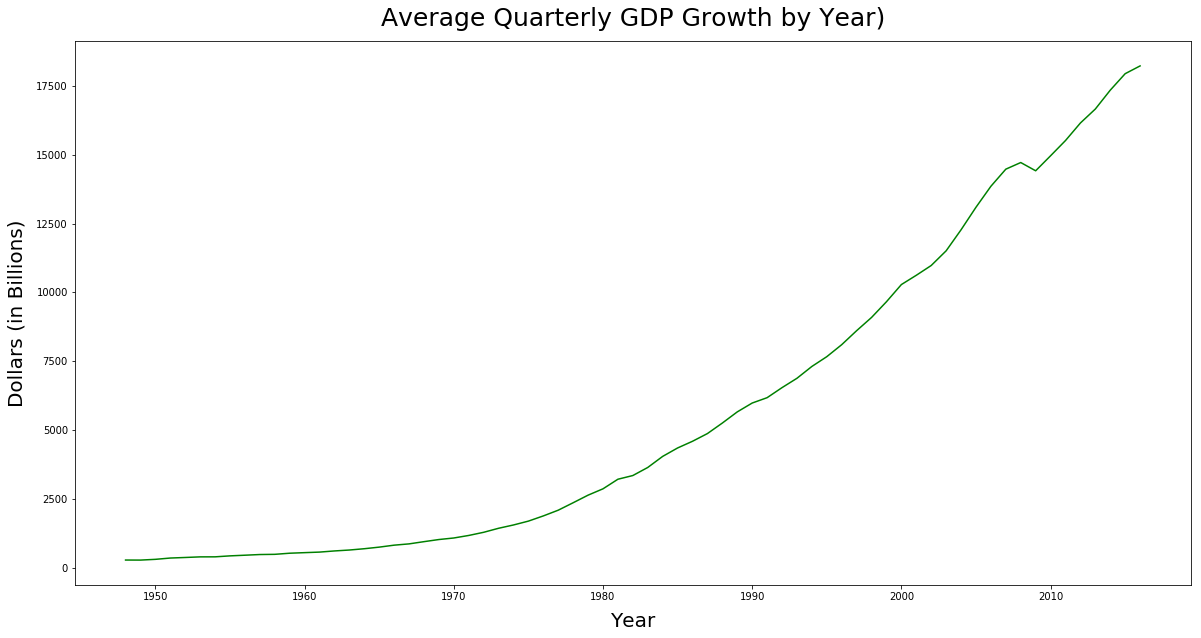

In [47]:
# plot crude data for GDP Growth
plt.figure(figsize=(20,10))
plt.title("Average Quarterly GDP Growth by Year)", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Dollars (in Billions)", fontsize=20, labelpad=10)
plt.plot(x_axis,dollars, color='green')
plt.savefig("Images/gdp-growth-lineplot.png",bbox_inches="tight")
plt.show()

In [48]:
# merge data frames on YEAR
total_df = pd.merge(percent_women_df,clean_yearly_gdp, how="left", on="Year")
total_df.head()

,Year,Women in Workforce(%),Dollars (in Billions)
0,1948,28.6,274.825
1,1949,29.0,272.850
2,1950,29.6,300.175
3,1951,30.7,347.325
4,1952,31.0,367.725


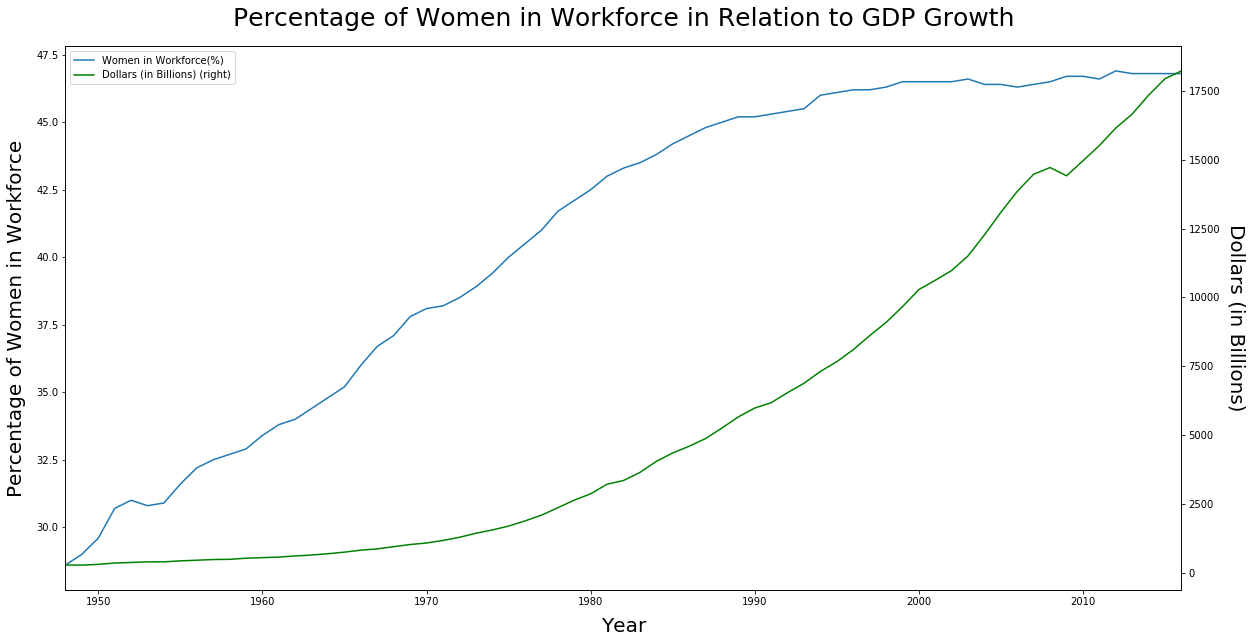

In [49]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
total_df.plot(x="Year", y="Women in Workforce(%)", ax=ax)
total_df.plot(x="Year", y="Dollars (in Billions)", color="green", secondary_y=True, ax=ax)
ax.set_title("Percentage of Women in Workforce in Relation to GDP Growth", fontsize=25, pad=20)
ax.set_xlabel("Year", fontsize=20, labelpad=10)
ax.set_ylabel("Percentage of Women in Workforce", fontsize=20, labelpad=10)
plt.ylabel("Dollars (in Billions)", fontsize=20, rotation=-90, labelpad=25)
fig.savefig("Images/percent-women-workforce-gdp-growth-double-lineplot.png",bbox_inches="tight")
plt.show()

In [50]:
labor_df = pd.read_csv('data/laborforce-participation-rate.csv')
labor_df.head(20)

,Year,All Women,All Men,White Women,White Men,Black Women,Black Men,Asian Women,Asian Men,Hispanic Women,Hispanic Men
0,1948,32.7,86.6,-,-,-,-,-,-,-,-
1,1949,33.1,86.4,-,-,-,-,-,-,-,-
2,1950,33.9,86.4,-,-,-,-,-,-,-,-
3,1951,34.6,86.5,-,-,-,-,-,-,-,-
4,1952,34.7,86.3,-,-,-,-,-,-,-,-
5,1953,34.4,86.0,-,-,-,-,-,-,-,-
6,1954,34.6,85.5,33.3,85.6,-,-,-,-,-,-
7,1955,35.7,85.4,34.5,85.4,-,-,-,-,-,-
8,1956,36.9,85.5,35.7,85.6,-,-,-,-,-,-
9,1957,36.9,84.8,35.7,84.8,-,-,-,-,-,-


In [51]:
women_laborforce_df = pd.DataFrame({"Year": labor_df["Year"],
                                   "White Women": labor_df["White Women"],
                                   "Black Women": labor_df["Black Women"],
                                   "Asian Women": labor_df["Asian Women"],
                                   "Hispanic Women": labor_df["Hispanic Women"]})
women_df = women_laborforce_df.drop([0,1,2,3,4,5])
women_df.head()

,Year,White Women,Black Women,Asian Women,Hispanic Women
6,1954,33.3,-,-,-
7,1955,34.5,-,-,-
8,1956,35.7,-,-,-
9,1957,35.7,-,-,-
10,1958,35.8,-,-,-


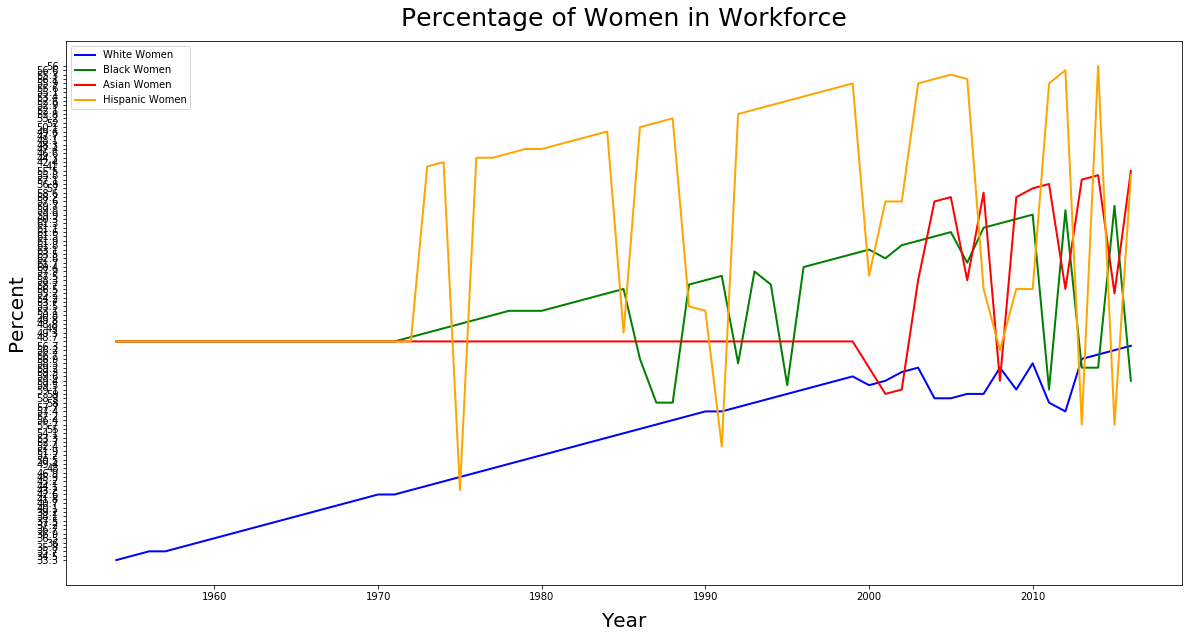

In [52]:
# multiple line plot
plt.figure(figsize=(20,10))
plt.title("Percentage of Women in Workforce", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Percent", fontsize=20, labelpad=10)
plt.plot(women_df["Year"], women_df["White Women"], color='blue', linewidth=2, label="White Women")
plt.plot(women_df["Year"], women_df["Black Women"], color='green', linewidth=2, label="Black Women")
plt.plot(women_df["Year"], women_df["Asian Women"], color='red', linewidth=2, label="Asian Women")
plt.plot(women_df["Year"], women_df["Hispanic Women"], color='orange', linewidth=2, label="Hispanic Women")
# plt.ylim(30,55)
plt.legend()
plt.savefig("Images/women-workforce-byrace-lineplot.png",bbox_inches="tight")
plt.show()

# fix tick locations!!!

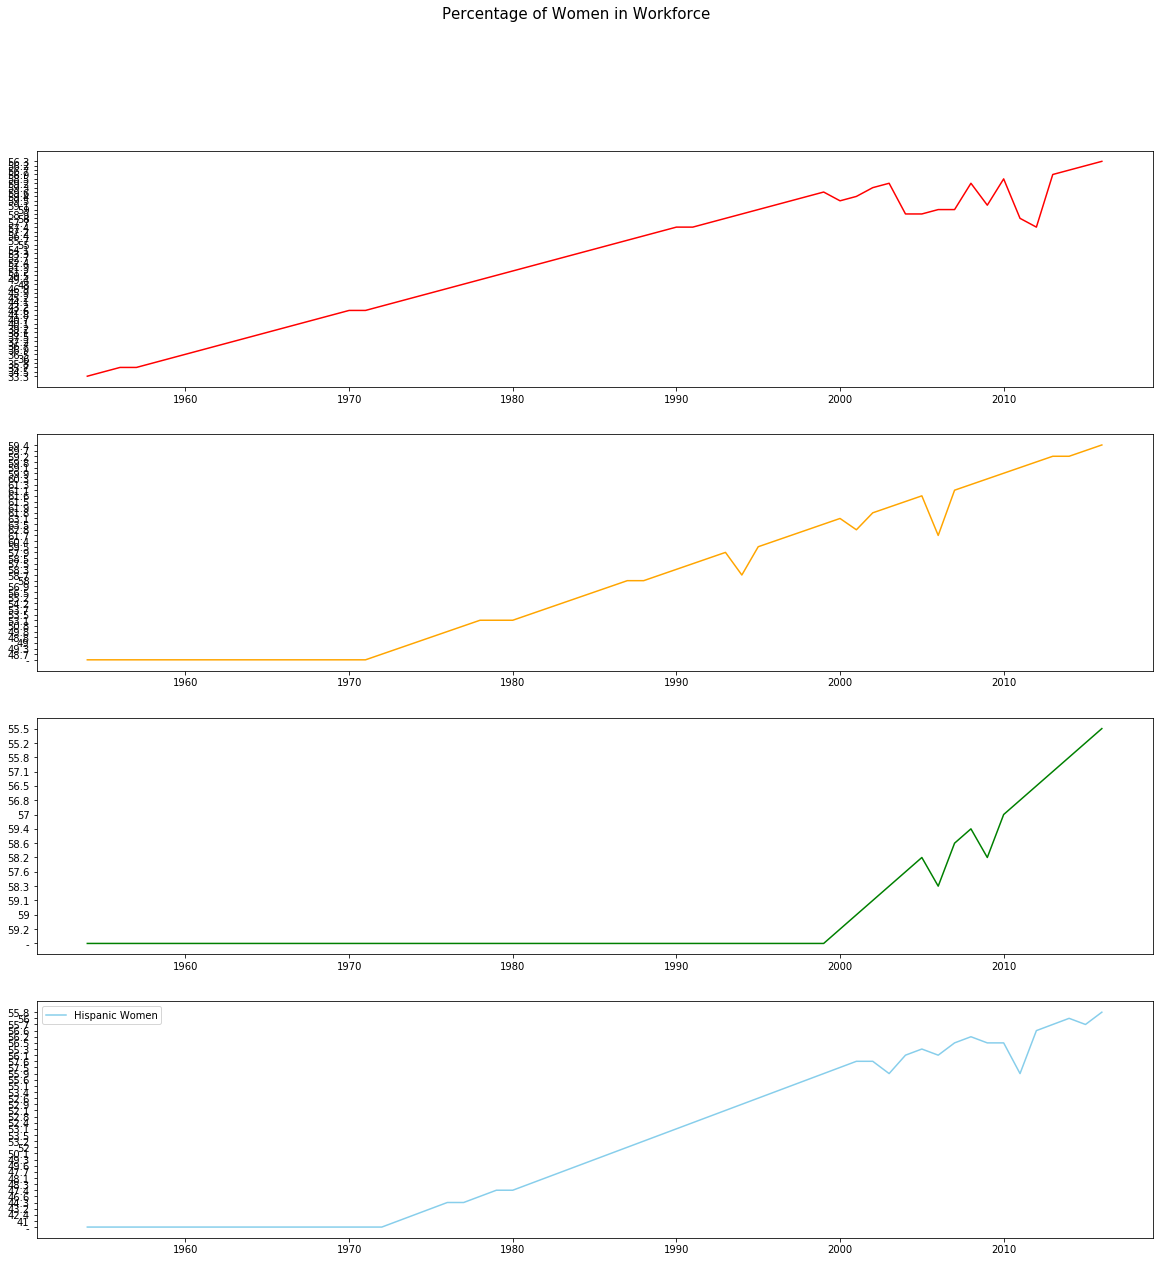

In [53]:
plt.figure(figsize=(20, 20))
plt.subplot(411)
plt.plot(women_df["Year"], women_df["White Women"], color="red")
plt.subplot(412)
plt.plot(women_df["Year"], women_df["Black Women"], color="orange")
plt.subplot(413)
plt.plot(women_df["Year"], women_df["Asian Women"], color="green")
plt.subplot(414)
plt.plot(women_df["Year"], women_df["Hispanic Women"], color="skyblue")
plt.suptitle("Percentage of Women in Workforce", fontsize=15)
plt.legend()
plt.savefig("Images/women-workforce-byrace2-lineplot.png",bbox_inches="tight")
plt.show()

# fix tick locations!!!

In [54]:
age_df = pd.read_csv('data/women-workforce-byage.csv')
age_df.head()

,Year,16 years and older,16 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and older
0,1948,32.7,43.9,33.2,36.9,35.0,24.3,9.1
1,1949,33.1,43.9,33.4,38.1,35.9,25.3,9.6
2,1950,33.9,43.9,34.0,39.1,37.9,27.0,9.7
3,1951,34.6,44.8,35.4,39.8,39.7,27.6,8.9
4,1952,34.7,43.6,35.4,40.4,40.1,28.7,9.1


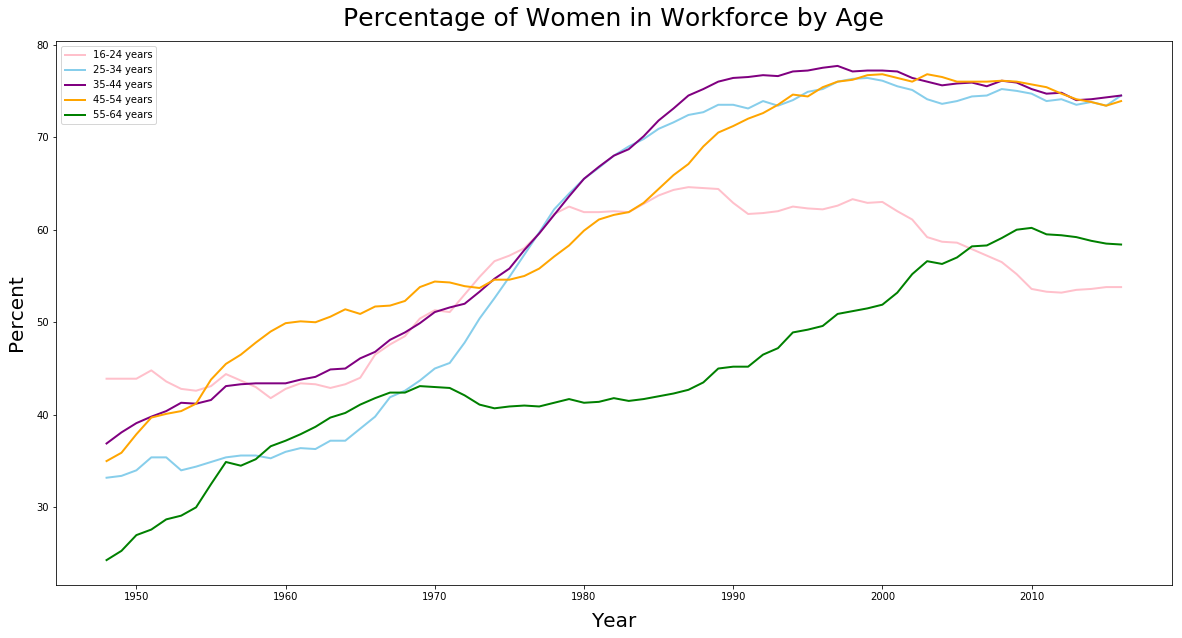

In [55]:
plt.figure(figsize=(20,10))
plt.title("Percentage of Women in Workforce by Age", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Percent", fontsize=20, labelpad=10)
plt.plot(age_df["Year"], age_df["16 to 24 years"], color='pink', linewidth=2, label="16-24 years")
plt.plot(age_df["Year"], age_df["25 to 34 years"], color='skyblue', linewidth=2, label="25-34 years")
plt.plot(age_df["Year"], age_df["35 to 44 years"], color='purple', linewidth=2, label="35-44 years")
plt.plot(age_df["Year"], age_df["45 to 54 years"], color='orange', linewidth=2, label="45-54 years")
plt.plot(age_df["Year"], age_df["55 to 64 years"], color='green', linewidth=2, label="55-64 years")
# plt.ylim(30,55)
plt.legend()
plt.savefig("Images/women-workforce-byage-multi-lineplot.png",bbox_inches="tight")
plt.show()

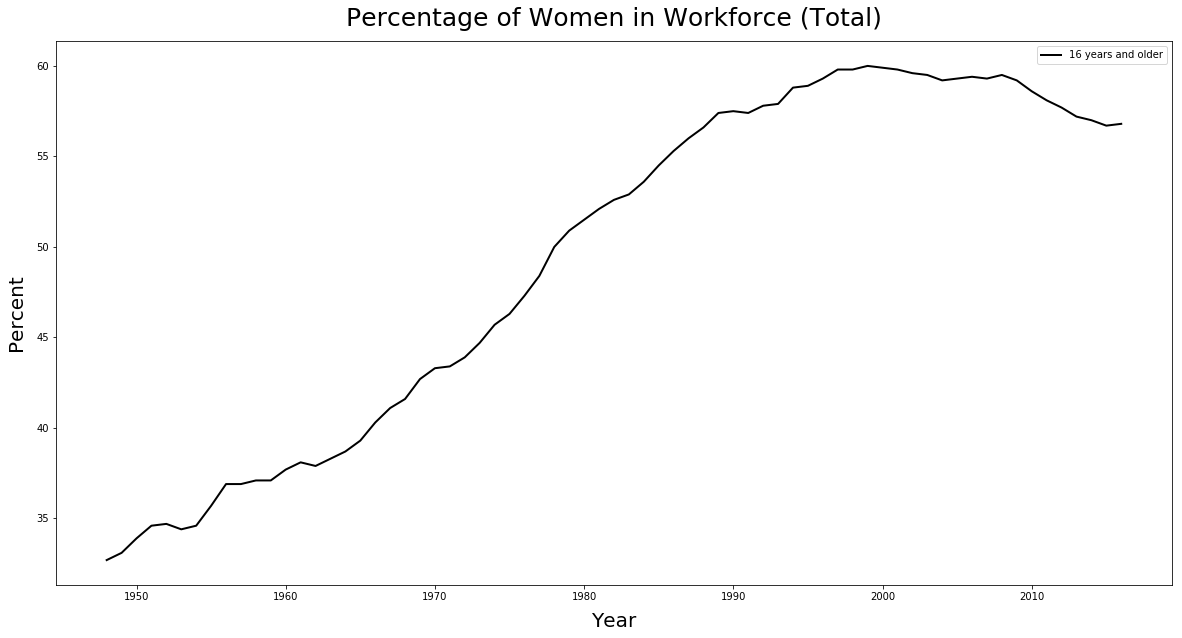

In [56]:
# checking total against the first crude data set of percentage of women in workforce 
plt.figure(figsize=(20,10))
plt.title("Percentage of Women in Workforce (Total)", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Percent", fontsize=20, labelpad=10)
plt.plot(age_df["Year"], age_df["16 years and older"], color='black', linewidth=2, label="16 years and older")
plt.legend()
plt.savefig("Images/checking-crude-total-workforce.png",bbox_inches="tight")
plt.show()

In [57]:
children_df = pd.read_csv('data/women-working-married-with-children-by-year.csv')
children_df.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
children_df.head()

,Year,With children ages 6 to 17,With children under age 6
0,1975,54.9,39.0
1,1976,56.2,40.1
2,1977,58.3,41.2
3,1978,60.0,44.0
4,1979,61.6,45.7


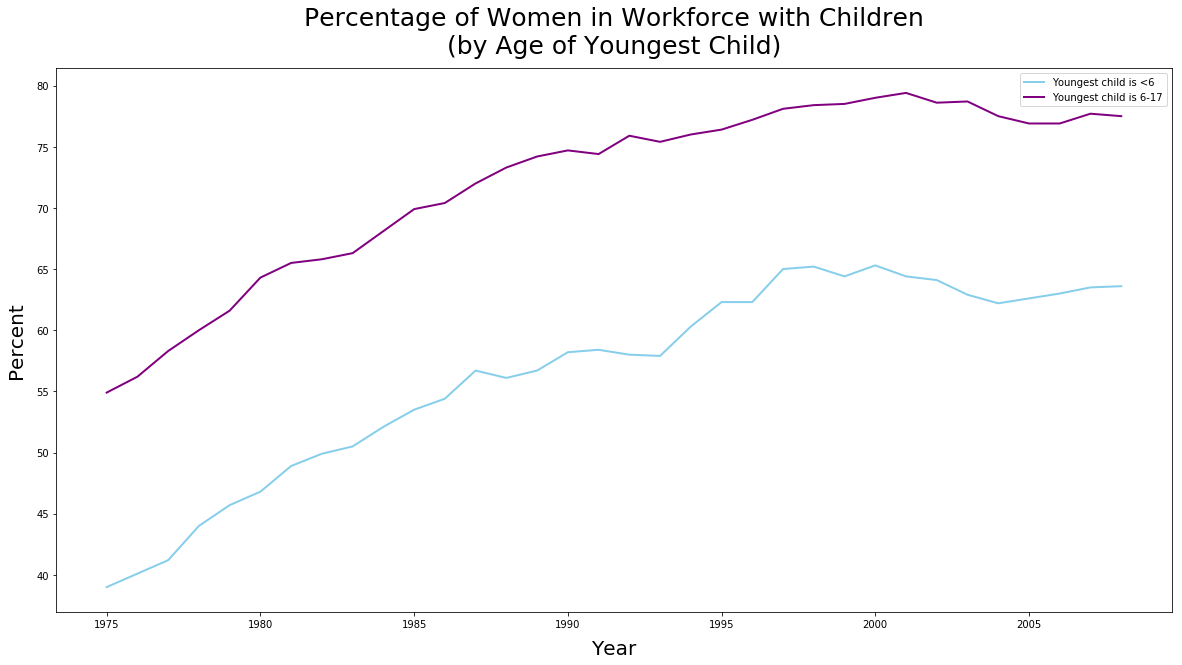

In [58]:
plt.figure(figsize=(20,10))
plt.title("Percentage of Women in Workforce with Children\n(by Age of Youngest Child)", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Percent", fontsize=20, labelpad=10)
plt.plot(children_df["Year"], children_df["With children under age 6"], color='skyblue', linewidth=2, label="Youngest child is <6")
plt.plot(children_df["Year"], children_df["With children ages 6 to 17"], color='purple', linewidth=2, label="Youngest child is 6-17")
plt.legend()
plt.savefig("Images/women-workforce-byyoungestchild-lineplot.png",bbox_inches="tight")
plt.show()

In [59]:
# average cost per employer per hour
df = pd.read_csv('data/avg-hourly-employee-cost.csv')
df.head()

,Year,Month,Value,Period
0,1969,December,37.7,M12
1,1969,December,37.7,M12
2,1969,December,37.7,M12
3,1969,December,37.7,M12
4,1969,December,37.7,M12


In [60]:
byyear = df.groupby('Year')
# byyear['Value'].max()
# byyear['Year'].unique()
x = byyear['Year'].unique()
y = byyear['Value'].max()

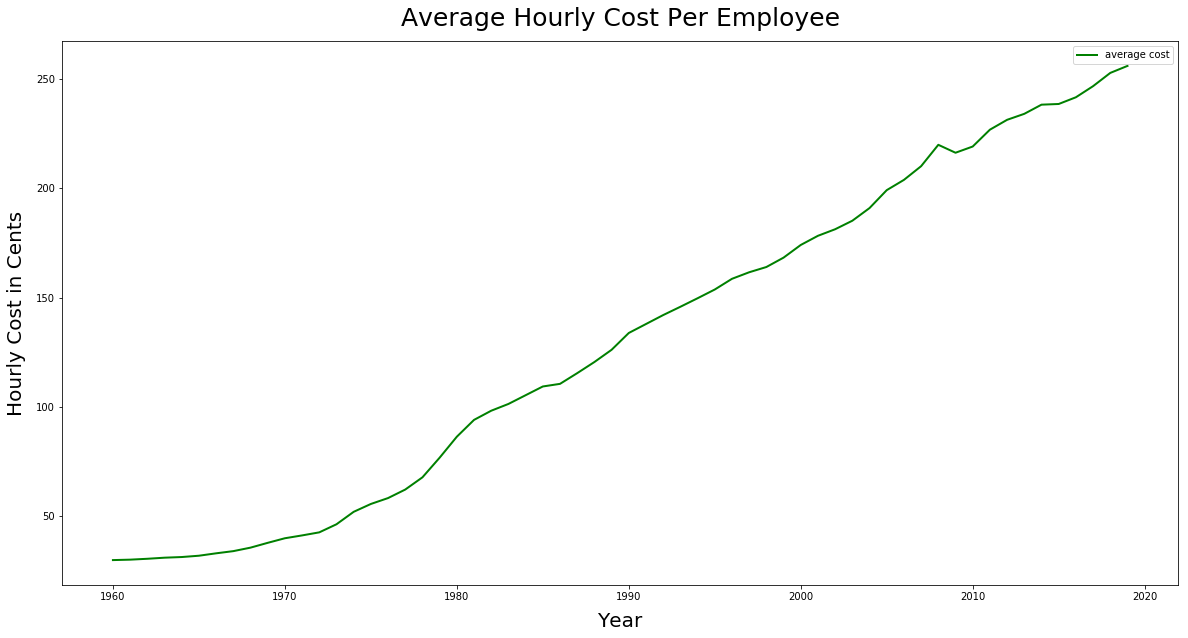

In [61]:
plt.figure(figsize=(20,10))
plt.title("Average Hourly Cost Per Employee", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Hourly Cost in Cents", fontsize=20, labelpad=10)
plt.plot(x, y, color='green', linewidth=2, label="average cost")
plt.legend()
plt.savefig("Images/average-hourly-cost-per-employee-lineplot.png",bbox_inches="tight")
plt.show()

In [62]:
new_df = pd.read_csv('data/employment-statusbygender-ageofyoungestchild.csv')
new_df.head()

,Age of youngest child,Mothers Full-time,Mothers Part-time,Fathers Full-time,Fathers Part-time
0,under 3 years,72.4,27.6,95.3,4.7
1,3 to 5 years,75.4,24.6,95.5,4.5
2,6 to 17 years,77.9,22.1,95.8,4.2
3,under 18 years,76.3,23.7,95.6,4.4


In [148]:
state_df = pd.read_csv('data/workforce-by-state-2018.csv')
state_df.head()

,State,Population group,Civilian non-institutional population,Total,Percent of population,Total Employed,Percent of population Employed,Total Unemployed,Rate Unemployed
0,Alabama,Total,"3,847","2,208",57.4,"2,121",55.1,87,3.9
1,Alabama,Men,"1,820","1,180",64.9,"1,135",62.4,45,3.8
2,Alabama,Women,"2,027","1,027",50.7,986,48.6,42,4.1
3,Alabama,White,"2,711","1,567",57.8,"1,523",56.2,44,2.8
4,Alabama,"White, men","1,310",880,67.2,857,65.4,23,2.6


In [149]:
unique_states = state_df["State"].unique()
unique_states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [150]:
# stategroups = state_df.groupby(["Population group","State"])
stategroups = state_df.groupby(["State","Population group"])
# stategroups.mean().head()
stategroups.mean().head()

Percent of population  \
State   Population group                                           
Alabama Black or African American                           55.8   
        Black or African American, men                      57.4   
        Black or African American, women                    54.6   
        Hispanic or Latino ethnicity                        67.5   
        Hispanic or Latino ethnicity, men                   87.4   

                                           Percent of population Employed  \
State   Population group                                                    
Alabama Black or African American                                    52.0   
        Black or African American, men                               53.1   
        Black or African American, women                             51.1   
        Hispanic or Latino ethnicity                                 64.4   
        Hispanic or Latino ethnicity, men                            85.1   

                                           Rate Unemployed  
State   Population group                                    
Alabama Black or African American                      6.9  
        Black or African American, men                 7.4  
        Black or African American, women               6.4  
        Hispanic or Latino ethnicity                   4.6  
        Hispanic or Latino ethnicity, men              2.6

In [145]:
AL_pop = state_df.loc[state_df['State'] == 'Alabama', 'Population group']
AL_employed = state_df.loc[state_df['State'] == 'Alabama', 'Percent of population Employed']
AL_unemployed = state_df.loc[state_df['State'] == 'Alabama', 'Rate Unemployed']

AL_df = pd.DataFrame({"Population Group": AL_pop,
                    "Percent Employed": AL_employed,
                    "Rate Unemployed": AL_unemployed})
AL_women = AL_df.loc[AL_df["Population Group"] == "Women", "Percent Employed"]
AL_women

2    48.6
Name: Percent Employed, dtype: object

In [151]:
AK_pop = state_df.loc[state_df['State'] == 'Alaska', 'Population group']
AK_employed = state_df.loc[state_df['State'] == 'Alaska', 'Percent of population Employed']
AK_unemployed = state_df.loc[state_df['State'] == 'Alaska', 'Rate Unemployed']

AK_df = pd.DataFrame({"Population Group": AK_pop,
                    "Percent Employed": AK_employed,
                    "Rate Unemployed": AK_unemployed})
AK_women = AK_df.loc[AK_df["Population Group"] == "Women", "Percent Employed"]
AK_women

32    58.2
Name: Percent Employed, dtype: float64

In [152]:
CA_pop = state_df.loc[state_df['State'] == 'California', 'Population group']
CA_employed = state_df.loc[state_df['State'] == 'California', 'Percent of population Employed']
CA_unemployed = state_df.loc[state_df['State'] == 'California', 'Rate Unemployed']

CA_df = pd.DataFrame({"Population Group": CA_pop,
                    "Percent Employed": CA_employed,
                    "Rate Unemployed": CA_unemployed})
CA_women = CA_df.loc[CA_df["Population Group"] == "Women", "Percent Employed"]
CA_women

116    52.9
Name: Percent Employed, dtype: float64

In [153]:
NY_pop = state_df.loc[state_df['State'] == 'New York', 'Population group']
NY_employed = state_df.loc[state_df['State'] == 'New York', 'Percent of population Employed']
NY_unemployed = state_df.loc[state_df['State'] == 'New York', 'Rate Unemployed']

NY_df = pd.DataFrame({"Population Group": NY_pop,
                    "Percent Employed": NY_employed,
                    "Rate Unemployed": NY_unemployed})
NY_women = NY_df.loc[NY_df["Population Group"] == "Women", "Percent Employed"]
NY_women

897    53.6
Name: Percent Employed, dtype: float64

In [160]:
women_group = state_df.groupby("Population group")
new = women_group.groupby("Women")

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method